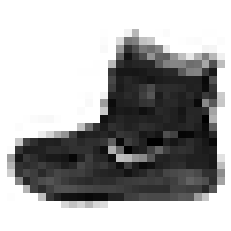

60000
10000
[[-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 ...
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]]


KeyboardInterrupt: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import gzip
%matplotlib inline

def showImage(data):
    some_article = data   # Selecting the image.
    some_article_image = some_article.reshape(28,28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

filePath_train_set = '/cxldata/datasets/project/fashion-mnist/train-images-idx3-ubyte.gz'
filePath_train_label = '/cxldata/datasets/project/fashion-mnist/train-labels-idx1-ubyte.gz'
filePath_test_set = '/cxldata/datasets/project/fashion-mnist/t10k-images-idx3-ubyte.gz'
filePath_test_label = '/cxldata/datasets/project/fashion-mnist/t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

X_train,X_test,y_train,y_test = trainSet,testSet,trainLabel,testLabel

showImage(X_train[0])

print(len(X_train))

print(len(X_test))

y_train[0]

np.random.seed(seed =42)

shuffle_index = np.random.permutation(60000)

X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

print(X_train_scaled)

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score,recall_score

from sklearn.metrics import f1_score

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state =42)

sgd_clf.fit(X_train_scaled,y_train)

y_train_predict = sgd_clf.predict(X_train[0].reshape(1,-1))

y_train[0]

y_train_predict[0]

showImage(X_train[0])

y_train_predict = sgd_clf.predict(X_train_scaled)

sgd_accuracy = accuracy_score(y_train,y_train_predict)
sgd_precision = precision_score(y_train,y_train_predict,average ='weighted')
sgd_recall = recall_score(y_train,y_train_predict,average ='weighted')
sgd_f1_score = f1_score(y_train,y_train_predict,average = 'weighted')

print(sgd_accuracy)

print(sgd_precision)

print(sgd_recall)

print(sgd_f1_score)

from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class = "multinomial", solver = "lbfgs",C=10,random_state =42)

log_clf.fit(X_train_scaled,y_train)

y_train_predict = log_clf.predict(X_train[0].reshape(1,-1))

y_train[0]

y_train_predict[0]

showImage(X_train[0])

y_train_predict = log_clf.predict(X_train_scaled)

log_accuracy = accuracy_score(y_train,y_train_predict)
log_precision = precision_score(y_train,y_train_predict,average ='weighted')
log_recall = recall_score(y_train,y_train_predict,average ='weighted')
log_f1_score = f1_score(y_train,y_train_predict,average = 'weighted')

print(log_accuracy)

print(log_precision)

print(log_recall)

print(log_f1_score)

from sklearn.tree import DecisionTreeClassifier

dec_tree_clf = DecisionTreeClassifier(max_depth =50, random_state =42)

dec_tree_clf.fit(X_train,y_train)

y_train_predict = dec_tree_clf.predict(X_train[0].reshape(1,-1))

y_train[0]

y_train_predict[0]

showImage(X_train[0])

y_train_predict = dec_tree_clf.predict(X_train)

dec_tree_accuracy = accuracy_score(y_train,y_train_predict)
dec_tree_precision = precision_score(y_train,y_train_predict,average ='weighted')
dec_tree_recall = recall_score(y_train,y_train_predict,average ='weighted')
dec_tree_f1_score = f1_score(y_train,y_train_predict,average = 'weighted')

print(dec_tree_accuracy)

print(dec_tree_precision)

print(dec_tree_recall)

print(dec_tree_f1_score)

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators =100, max_depth=50,random_state =42)

rnd_clf.fit(X_train,y_train)

y_train_predict = rnd_clf.predict(X_train[0].reshape(1,-1))

y_train[0]

y_train_predict[0]

showImage(X_train[0])

y_train_predict = rnd_clf.predict(X_train)

rnd_accuracy = accuracy_score(y_train,y_train_predict)
rnd_precision = precision_score(y_train,y_train_predict,average ='weighted')
rnd_recall = recall_score(y_train,y_train_predict,average ='weighted')
rnd_f1_score = f1_score(y_train,y_train_predict,average = 'weighted')

print(rnd_accuracy)

print(rnd_precision)

print(rnd_recall)

print(rnd_f1_score)

from sklearn.ensemble import VotingClassifier

log_clf_ens = LogisticRegression(multi_class = "multinomial",solver="lbfgs",C=10,random_state =42)

rnd_clf_ens = RandomForestClassifier(n_estimators =100, max_depth=50,random_state =42)

voting_clf = VotingClassifier(estimators =[('lr',log_clf_ens),('rf',rnd_clf_ens)],voting = 'soft')

voting_clf.fit(X_train_scaled,y_train)

y_train_predict = voting_clf.predict(X_train[0].reshape(1,-1))

y_train[0]

y_train_predict[0]

showImage(X_train[0])

y_train_predict = voting_clf.predict(X_train_scaled)

voting_accuracy = accuracy_score(y_train,y_train_predict)
voting_precision = precision_score(y_train,y_train_predict,average ='weighted')
voting_recall = recall_score(y_train,y_train_predict,average ='weighted')
voting_f1_score = f1_score(y_train,y_train_predict,average = 'weighted')

print(voting_accuracy)

print(voting_precision)

print(voting_recall)

print(voting_f1_score)

def display_score(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

sgd_cv_scores = cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring ="accuracy")

display_score(sgd_cv_scores)

sgd_cv_accuracy = sgd_cv_scores.mean()
print(sgd_cv_accuracy)

y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)

confusion_matrix(y_train,y_train_pred)

sgd_cv_precision = precision_score(y_train,y_train_pred,average ='weighted')
sgd_cv_recall = recall_score(y_train,y_train_pred,average ='weighted')
sgd_cv_f1_score = f1_score(y_train,y_train_pred,average ='weighted')

print(sgd_cv_precision)
print(sgd_cv_recall)
print(sgd_cv_f1_score)

log_cv_scores = cross_val_score(log_clf,X_train_scaled,y_train,cv=3,scoring ="accuracy")

display_score(log_cv_scores)

log_cv_accuracy = log_cv_scores.mean()
print(log_cv_accuracy)

y_train_pred = cross_val_predict(log_clf,X_train_scaled,y_train,cv=3)

confusion_matrix(y_train,y_train_pred)

log_cv_precision = precision_score(y_train,y_train_pred,average ='weighted')
log_cv_recall = recall_score(y_train,y_train_pred,average ='weighted')
log_cv_f1_score = f1_score(y_train,y_train_pred,average = 'weighted')

print(log_cv_precision)

print(log_cv_recall)

print(log_cv_f1_score)

from sklearn.tree import DecisionTreeClassifier

dec_tree_clf = DecisionTreeClassifier(max_depth=50,random_state=42)

dec_tree_cv_scores = cross_val_score(dec_tree_clf,X_train,y_train,cv=3,scoring="accuracy")

display_score(dec_tree_cv_scores)

dec_tree_cv_accuracy = dec_tree_cv_scores.mean()

print(dec_tree_cv_accuracy)

y_train_pred = cross_val_predict(dec_tree_clf,X_train,y_train,cv=3)

confusion_matrix(y_train,y_train_pred)

dec_tree_cv_precision = precision_score(y_train,y_train_pred,average ='weighted')
dec_tree_cv_recall = recall_score(y_train,y_train_pred,average ='weighted')
dec_tree_cv_f1_score = f1_score(y_train,y_train_pred,average = 'weighted')

print(dec_tree_cv_precision)
print(dec_tree_cv_recall)
print(dec_tree_cv_f1_score)

rnd_clf = RandomForestClassifier(n_estimators =20, max_depth=10,random_state =42)

rnd_cv_scores = cross_val_score(rnd_clf,X_train,y_train,cv=3,scoring="accuracy")

display_score(rnd_cv_scores)

rnd_cv_accuracy = rnd_cv_scores.mean()
print(rnd_cv_accuracy)

y_train_pred = cross_val_predict(rnd_clf,X_train,y_train,cv=3)

confusion_matrix(y_train,y_train_pred)

rnd_cv_precision = precision_score(y_train,y_train_pred,average ='weighted')
rnd_cv_recall = recall_score(y_train,y_train_pred,average ='weighted')
rnd_cv_f1_score = f1_score(y_train,y_train_pred,average = 'weighted')

print(rnd_cv_precision)
print(rnd_cv_recall)
print(rnd_cv_f1_score)

rnd_clf_ens = RandomForestClassifier(n_estimators =20, max_depth=10,random_state =42)

voting_clf = VotingClassifier(estimators =[('lr',log_clf_ens),('rf',rnd_clf_ens)],voting = 'soft')

voting_cv_scores = cross_val_score(voting_clf,X_train,y_train,cv=3,scoring="accuracy")

display_score(voting_cv_scores)

voting_cv_accuracy = voting_cv_scores.mean()
print(voting_cv_accuracy)

y_train_pred = cross_val_predict(voting_clf,X_train,y_train,cv=3)

confusion_matrix(y_train,y_train_pred)

voting_cv_precision = precision_score(y_train,y_train_pred,average ='weighted')
voting_cv_recall = recall_score(y_train,y_train_pred,average ='weighted')
voting_cv_f1_score = f1_score(y_train,y_train_pred,average = 'weighted')

print(voting_cv_precision)
print(voting_cv_recall)
print(voting_cv_f1_score)

from sklearn.decomposition import PCA

pca =PCA(n_components=0.99)

X_train_reduced = pca.fit_transform(X_train)

pca.n_components_

np.sum(pca.explained_variance_ratio_)

X_train_recovered = pca.inverse_transform(X_train_reduced)

import matplotlib
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
# Plotting 'original' image
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(X_train_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

from sklearn.model_selection import GridSearchCV

param_grid = [{ "lr__multi_class":["multinomial"],"lr__solver":["lbfgs"],"lr__C":[5],"rf__n_estimators":[20],"rf__max_depth":[10,15],}]

voting_clf_grid_search = VotingClassifier(estimators =[('lr',log_clf_ens),('rf',rnd_clf_ens)],voting = 'soft')

grid_search = GridSearchCV(voting_clf_grid_search,param_grid,cv=3,scoring="neg_mean_squared_error")

grid_search.fit(X_train_reduced,y_train)

grid_search.best_params_

grid_search.best_estimator_

cvres =grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

final_model = grid_search.best_estimator_

X_test_reduced = pca.transform(X_test)
len(X_test_reduced)

y_test_predict =final_model.predict(X_test_reduced)

confusion_matrix(y_test,y_test_predict)

final_accuracy = accuracy_score(y_test,y_test_predict)
final_precision = precision_score(y_test,y_test_predict,average ='weighted')
final_recall = recall_score(y_test,y_test_predict,average ='weighted')
final_f1_score = f1_score(y_test,y_test_predict,average = 'weighted')

print(final_accuracy)
print(final_precision)
print(final_recall)
print(final_f1_score)

y_test[0]

y_test_predict[0]

showImage(X_test[0])
